<a href="https://colab.research.google.com/github/yejin-park/MachineLearning/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4EDA_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 따릉이 데이터를 활용한 데이터 분석


> 각 날짜의 1시간 전의 [기상상황]을 가지고 1시간 후의 [따릉이 대여수]를 예측





# 1. 라이브러리 및 데이터 [Library & Data]

In [1]:
import pandas as pd #판대스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜던 포레스트 불러오기

In [2]:
# 데이터 불러오기
train = pd.read_csv('/content/data/train.csv') # 모델 학습 파일
test = pd.read_csv('/content/data/test.csv')   # 모델 시험지 파일
submission = pd.read_csv('/content/data/submission.csv') # 답안지 파일


# 2. 탐색적 자료분석 
# Exploratory Data Analysis (EDA)

## pd.DataFrame.head()

*   데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
*   n의 기본 값(default 값)은 5



In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
test.head() # train 값과 달리 마지막 열에 'count'가 없음 _ 내가 예측해야하는 부분

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
submission.head()  #예측한 count 값을 표현할 수 있는 칸

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


## pd.DataFrame.tail()

*   데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
*   n의 기본 값(default값)은 5



In [6]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


## pd.DataFrame.shape

*   데이터 프레임의 [ 행의 개수 ]와 [ 열의 개수 ]가 저장되어있는 속성(attribute)



In [9]:
print(train.shape)
print(test.shape, "count열이 없으므로 -1 ")
print(submission.shape)

(1459, 11)
(715, 10) count열이 없으므로 -1 
(715, 2)


## pd.DataFrame.info()

*   데이터셋의 cloumn별 정보를 알려주는 함수
*   비어 있지 않은 값은 (non-null)은 몇개인지?
*   column의 type은 무엇인지?
           ->  type의 종류 : int, float, object(문자열)..


In [10]:
train.info()   #전체 (1459) 중 결측값을 찾아 데이터 오류 줄이기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


## pd.DataFrame.describe()


*   숫자형(int, float) column들의 [기술 통계량]을 보여주는 함수
*   기술통계량 : 해당 column을 대표할 수 있는 통계값들을 의미
<기술통계랑 종류>
1.   count : 해당 column에서 비어있지않은 값의 개수
2.   mean 평균 / std 표준편차
3.   min max (이상치 포함)
4.   25% (Q1) / 75% (Q3) : **아래부터** 1/4번째 & 3/4번째 지점까지 
5.   이상치 : 울타리 밖에 있는 부분을 이상치라고 정의함 ***`===> 이상치는 아직 잘 모르겠음`***




In [11]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


## pd.DataFrame.groupby()
*   집단에 대한 통계량 확인

In [13]:
train.groupby('hour').mean()['count']  # hour 가 컬럼명이므로!
# hour시간별로 대여랑의 평균값이 계산되었고 'count'컬럼만 출력

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

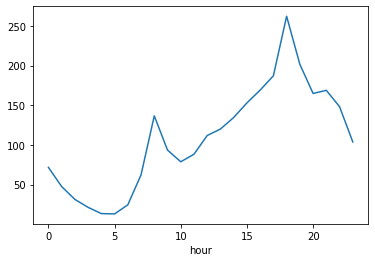

In [14]:
###### 시각화 plot ######
train.groupby('hour').mean()['count'].plot()

### 그래프로 커스터마이징하기위해 `시각화 전용 패키지matplotlib` 사용
*   색깔 : 빨r 초g 파b 노y 검b 흰w / 청록(cyan)c / 자홍(magenta)m
*   마커 : 점. 원o 역삼각형v 삼각형^ 사각형s 별* 엑스x 다이아몬드d
*   문자열 : 실선- 끊어진실선-- 점+실선-. 점선:



In [15]:
import matplotlib.pyplot as plt #앞에 것들을 plt로 칭하겠다

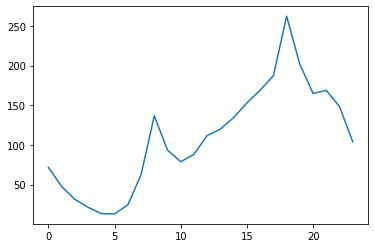

In [16]:
plt.plot(train.groupby('hour').mean()['count'])
# plt 내에 .plot()함수가 있음
# "train.groupby('hour').mean()['count'].plot()" 코드와 동일한 결과

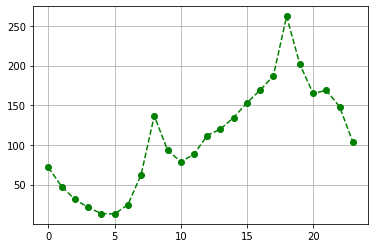

In [23]:
###### 한번더 커스터마이징 하자면 ######
plt.plot(train.groupby('hour').mean()['count'], 'go--')
plt.grid()

### plt.title(label, fontsize)
*   그래프 제목 생성

### plt.xlabel(label, fontsize)
*   x축 이름 설정

### plt.ylabel(label, fontsize)
*   y축 이름 설정


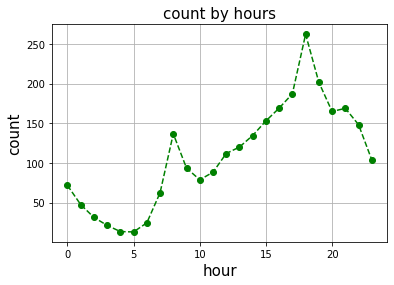

In [25]:
plt.plot(train.groupby('hour').mean()['count'], 'go--')
plt.grid()

plt.title('count by hours', fontsize = 15)
plt.xlabel('hour', fontsize = 15)
plt.ylabel('count', fontsize = 15)

#그래프 이미지 저장 시
plt.savefig('picture.png')


### plt.axvline(x, color)
*   축을 가로지르는 세로 선 생성

### plt.text(x,y,s,fontsize)
*   원하는 위치에 텍스트 생성


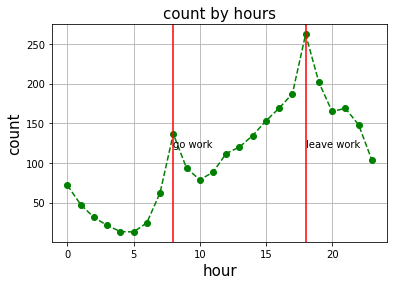

In [29]:
plt.plot(train.groupby('hour').mean()['count'], 'go--')
plt.grid()

plt.title('count by hours', fontsize = 15)
plt.xlabel('hour', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.axvline(8, color = 'r') # 'red'라 하면 오류남 
plt.axvline(18, color = 'r')

plt.text(8, 120, 'go work', fontsize = 10)
plt.text(18, 120, 'leave work', fontsize = 10)

plt.savefig('picture.png')

### 매번 모든 데이터를 위와 같이 그래프로 표현할 수 없으니 
### 단순히 수로 나타내기 위해 [상관계수] 등장!

> 상관계수 : 두 개의 변수가 같이 일어나는 강도를 나타내는 수치 (!= 기울기)


*   -1 에서 1사이의 값을 지님
*   -1 이나 1인 수치는 현실 세계에서 관측되기 힘든 수치임
*   보통 0.4이상이면 두 변수간에 상관성이 있다고 얘기함 
(분야별/기준별 상이할 수도) 





x변수 증가 -> y변수도 증가상황 : 1
* x변수 증가 -> y변수 증가하는 상관정도가 약해질?수록 : 0 
* x변수 중가 -> y변수 감소상황 : -1
> '기울기'와는 다른 개념!!  비례 반비례랑도 아예 다름!!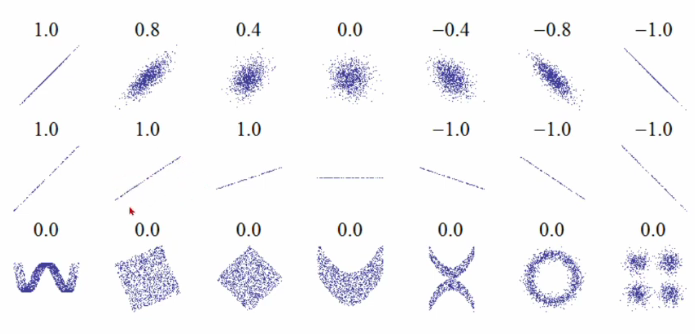

## 그리고! 상관관계 & 인과관계는 다름
> ex) 선글라스와 아이스크림 판매량

## pd.DataFrame.corr()
*   correlation coefficient 의 줄임말

+) 상관계수가 높은 변수들을 골라 모델을 생성한다 (간단히 표현하자면)

In [30]:
import seaborn as sns

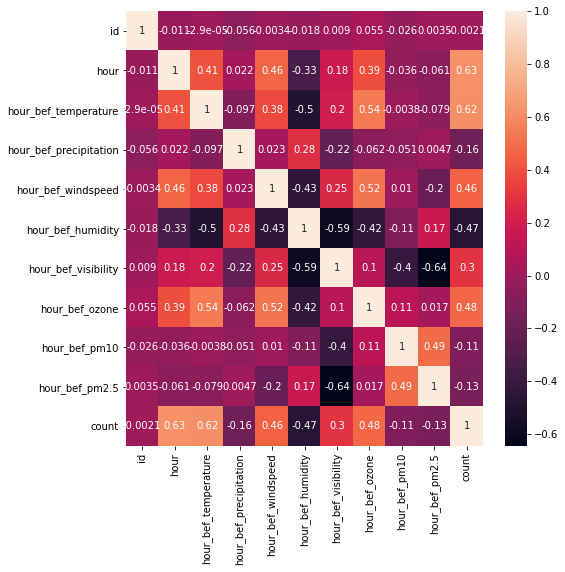

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(), annot = True)  #annot =True : 숫자 표시